In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from textblob import TextBlob  # For sentiment analysis




In [14]:
# Load the dataset
housing_data = pd.read_csv("housing_data.csv")


print(housing_data.head())


  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0       SC60       RL           65     8450   Pave   NaN      Reg         Lvl   
1       SC20       RL           80     9600   Pave   NaN      Reg         Lvl   
2       SC60       RL           68    11250   Pave   NaN      IR1         Lvl   
3       SC70       RL           60     9550   Pave   NaN      IR1         Lvl   
4       SC60       RL           84    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0     No    No          No       0    Feb   
1    AllPub       FR2  ...        0     No    No          No       0    May   
2    AllPub    Inside  ...        0     No    No          No       0    Sep   
3    AllPub    Corner  ...        0     No    No          No       0    Feb   
4    AllPub       FR2  ...        0     No    No          No       0    Dec   

   YrSold  SaleType  SaleCondition  Sa

# Visualizing the Impact of Amenities on House Prices

In [18]:
print(housing_data.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

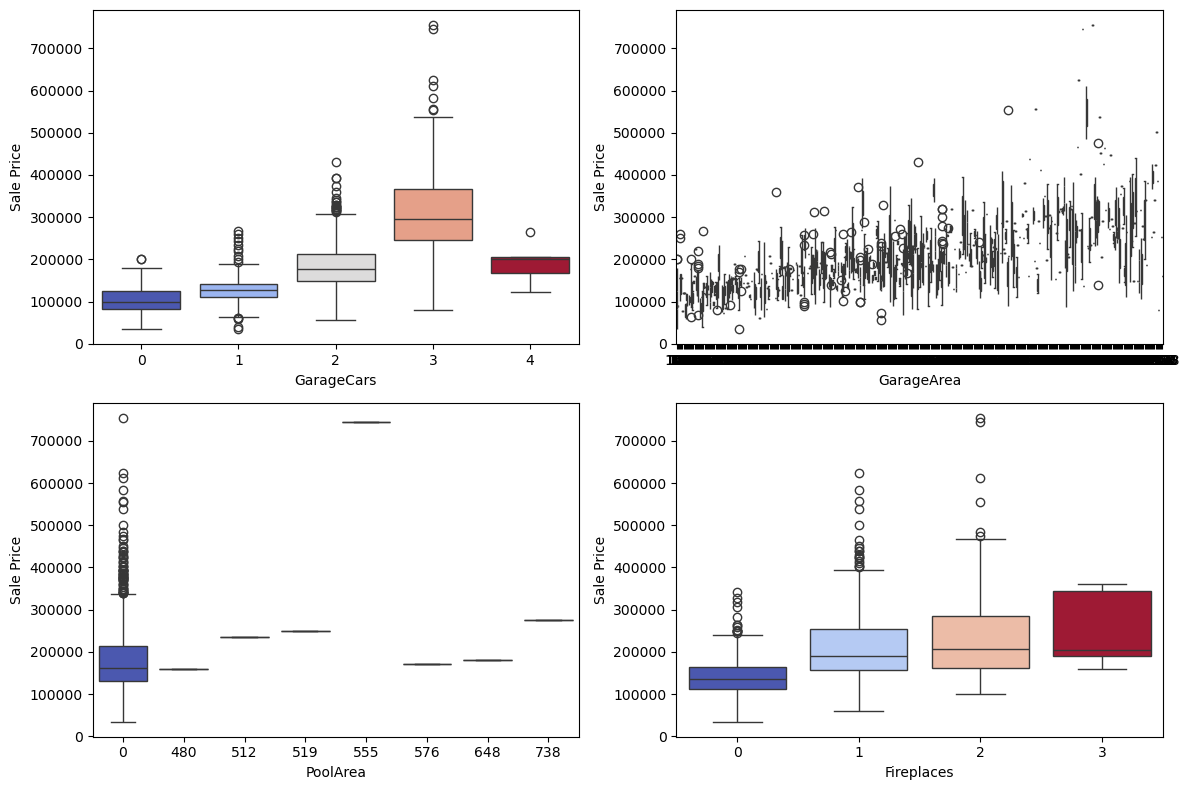

In [23]:
amenities = ['GarageCars', 'GarageArea', 'PoolArea', 'Fireplaces']

plt.figure(figsize=(12, 8))
for i, amenity in enumerate(amenities, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=housing_data[amenity], y=housing_data['SalePrice'], hue=housing_data[amenity], palette="coolwarm", legend=False)
    plt.xlabel(amenity)
    plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

In [22]:
print(housing_data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [53]:

''' did not find any reviews column so i added dummy column in dataset for apply sentiment analysis on customer reviews '''
reviews = [
    "Great house with excellent amenities!",
    "Too expensive for the location.",
    "Loved the swimming pool and garage.",
    "The house was okay but needed renovations.",
    "Amazing neighborhood and well-built house.",
    "Small rooms but great backyard.",
    "Needs a lot of repairs, not worth the price.",
    "Very spacious and modern design!"
]

housing_data['Reviews'] = np.random.choice(reviews, size=len(housing_data))


# Sentiment Analysis on Customer Reviews

In [57]:
# Function to calculate sentiment score
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# sentiment analysis
housing_data['SentimentScore'] = housing_data['Reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)




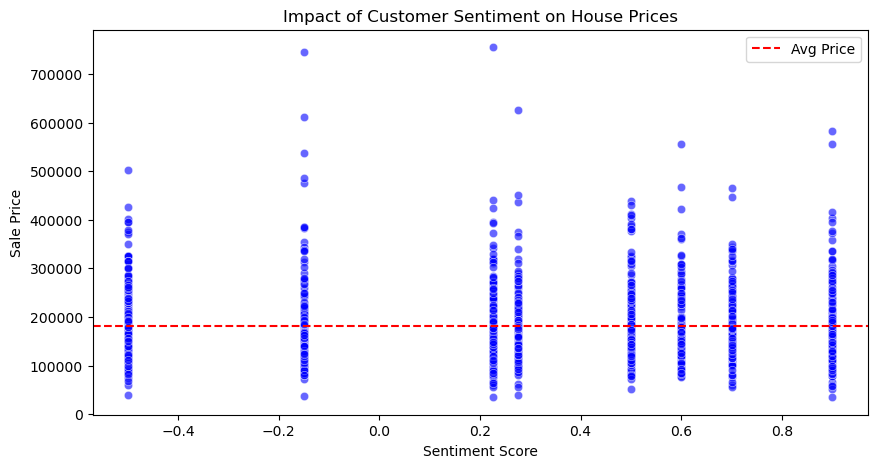

In [59]:
# Visualize sentiment impact on house prices
plt.figure(figsize=(10, 5))
sns.scatterplot(x=housing_data['SentimentScore'], y=housing_data['SalePrice'], color='b', alpha=0.6)
plt.axhline(housing_data['SalePrice'].mean(), color='r', linestyle='dashed', label="Avg Price")
plt.xlabel("Sentiment Score")
plt.ylabel("Sale Price")
plt.title("Impact of Customer Sentiment on House Prices")
plt.legend()
plt.show()

# Clustering Houses Based on Amenities

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


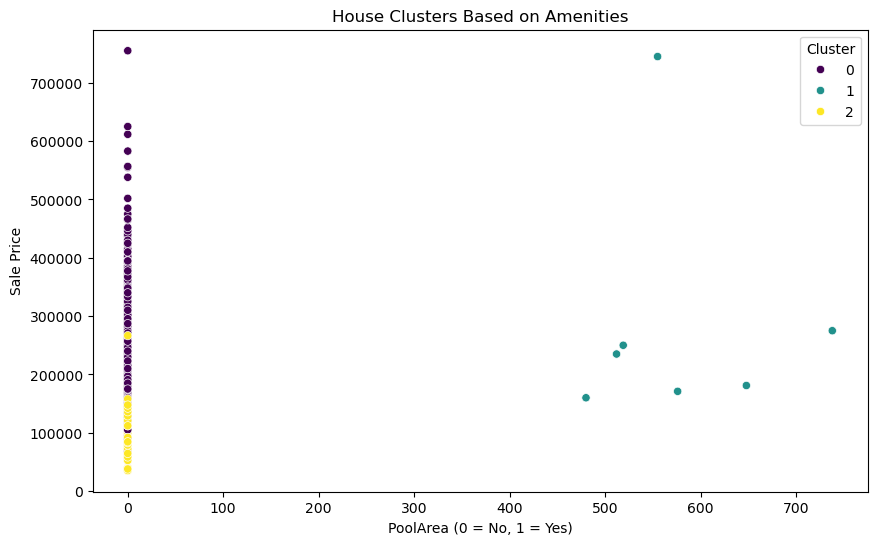

In [72]:
# Selecting amenity-related features for clustering
X = housing_data[amenities]

# Standardizing the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
housing_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['PoolArea'], y=housing_data['SalePrice'], hue=housing_data['Cluster'], palette="viridis")
plt.xlabel("PoolArea (0 = No, 1 = Yes)")
plt.ylabel("Sale Price")
plt.title("House Clusters Based on Amenities")
plt.legend(title="Cluster")
plt.show()
